In [ ]:
"""
Problem Statement

In this assignment students have to make ARIMA model over shampoo sales data and
check the MSE between predicted and actual value.

Student can download data in .csv format from the following link:
https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds
=22r0&display=line

Hint:

Following is the command import packages and data

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
def parser(x):
return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0,
squeeze=True, date_parser=parser)

"""

In [ ]:
url=https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

In [62]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


In [63]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')


In [64]:
series =read_csv('shampoo-sales.csv', header=0, parse_dates=True , index_col='Month')
series.head(50)
series=series[:36]
series

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3
1-06,168.5
1-07,231.8
1-08,224.5
1-09,192.8


       Sales
Month       
1-01   266.0
1-02   145.9
1-03   183.1
1-04   119.3
1-05   180.3
1-06   168.5
1-07   231.8
1-08   224.5
1-09   192.8
1-10   122.9
1-11   336.5
1-12   185.9
2-01   194.3
2-02   149.5
2-03   210.1
2-04   273.3
2-05   191.4
2-06   287.0
2-07   226.0
2-08   303.6
2-09   289.9
2-10   421.6
2-11   264.5
2-12   342.3
3-01   339.7
3-02   440.4
3-03   315.9
3-04   439.3
3-05   401.3
3-06   437.4
3-07   575.5
3-08   407.6
3-09   682.0
3-10   475.3
3-11   581.3
3-12   646.9


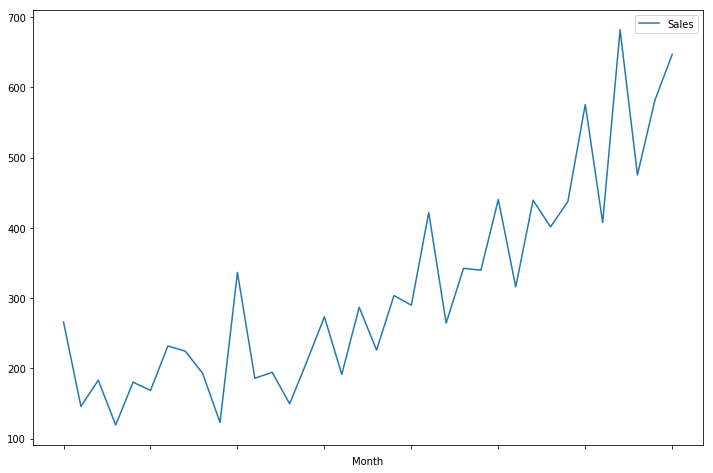

In [65]:
print(series.head(50))
series.plot(figsize=(12,8))
plt.show()

In [66]:
series=series[:36]
size = int(len(series) * 0.60)
print(len(series))
print(size)


36
21


In [67]:
# clearly we have trend, and some seasonality by looking at the graph.

In [68]:
# have to check stationarity of he series by roling statisctics and dickey fuller test

In [69]:
def get_mean_var(series, no_of_samples):
    split_size = int(len(series) / no_of_samples)
    start = 0
    for i in range(no_of_samples):
        sample_series = series[i*split_size:(i+1)*split_size]
        #print(sample_series,"\n")
        print('Mean= %.2f, Variance= %.2f' % (sample_series.mean(), sample_series.var()))
get_mean_var(series,5)        

Mean= 184.99, Variance= 2482.41
Mean= 200.91, Variance= 4667.41
Mean= 254.47, Variance= 1973.15
Mean= 366.24, Variance= 4677.47
Mean= 508.63, Variance= 11286.85


In [ ]:
# both mean and variance values are varying a lot. Hence not stationary. Couple of more methods to check stationarity of timeseries model.

In [88]:
from statsmodels.tsa.stattools import adfuller


def plot_rolling_statistics(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=3).mean()
    rolstd = timeseries.rolling(window=3).std()
    
#     print(rolmean)
#     print("-"*80)
#     print(rolstd)
#     print("-"*80)
    
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.figure(figsize=(10,20))

    plt.show()
    
    

# def dickey_fuller_test(timeseries):
#     #Perform Dickey-Fuller test:
#     print('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries, autolag='AIC')
#     #https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
#     #statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', 
#     # store=False, regresults=False)
    
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print(dfoutput)

    
    
    
    
def test_stationarity(timeseries):
    
    plot_rolling_statistics(timeseries)
#     dickey_fuller_test(timeseries)
    
  

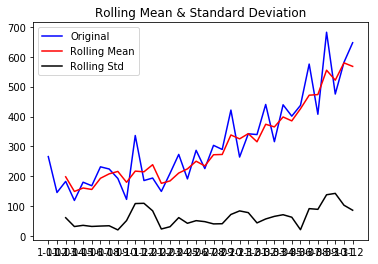

<Figure size 720x1440 with 0 Axes>

In [89]:

test_stationarity(series)


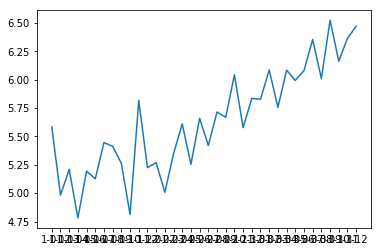

In [72]:
log_scale = np.log(series) # trend will be same just y axis will change 
plt.plot(log_scale)

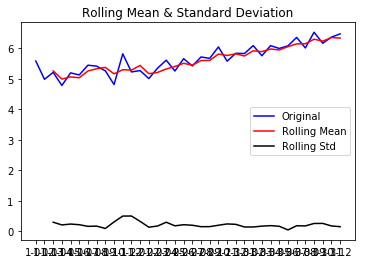

<Figure size 720x1440 with 0 Axes>

In [73]:
plot_rolling_statistics(log_scale)

In [74]:
rolmean = series.rolling(window=12).mean()

diff = log_scale - rolmean

diff.tail()

,Sales
Month,
3-08,-383.606380
3-09,-415.766637
3-10,-420.602720
3-11,-446.801400
3-12,-472.077808


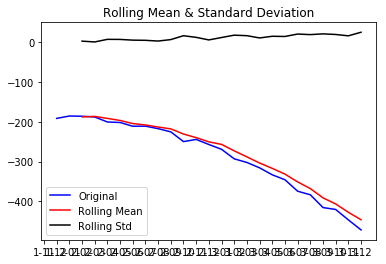

<Figure size 720x1440 with 0 Axes>

In [75]:
plot_rolling_statistics(diff)

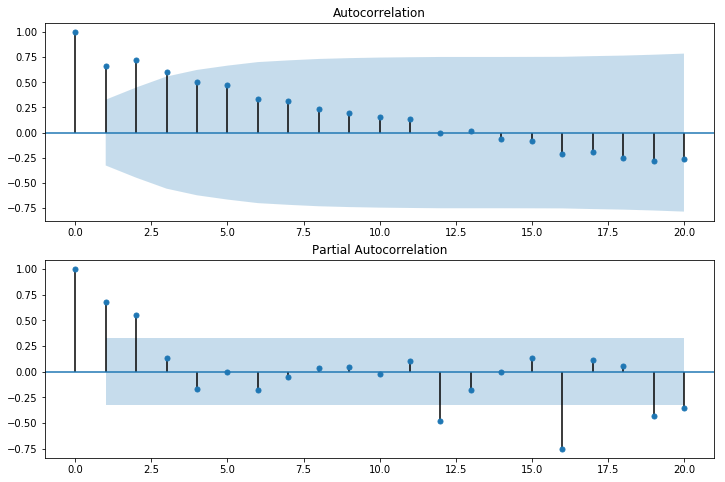

In [80]:
%matplotlib inline
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series.values.squeeze(), lags=20, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series.values.squeeze(), lags=20, ax=ax2)

In [81]:
sm.stats.durbin_watson(series)

array([0.09548538])

In [ ]:
# The value of Durbin-Watson statistic is close to 2 if the errors are uncorrelated. In our example, it is 0.0954. That means that there is a strong evidence that the variable open has high autocorrelation

In [83]:
arma_mod20 = sm.tsa.ARMA(series, order=(2,0)).fit()
print(arma_mod20.params)

C:\Users\gaura\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\gaura\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\gaura\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\gaura\Anaconda3\lib\site-

const          379.068608
ar.L1.Sales      0.261716
ar.L2.Sales      0.685837
dtype: float64


In [84]:
sm.stats.durbin_watson(arma_mod20.resid.values)
#The Durbin-Watson test shows no autocorrelation.

1.9225270946337283

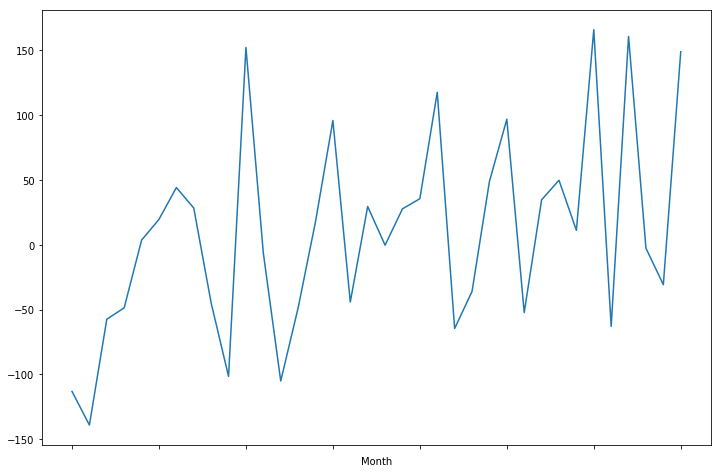

In [85]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);

In [93]:
shampoo_predict = arma_mod20.predict('2-12', '4-12', dynamic=True)

print(shampoo_predict)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [94]:
size = int(len(series) * 0.60)
print(len(series))
print(size)


train, test = series[0:size], series[size:len(series)]

36
21


In [103]:

history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

ValueError: Insufficient degrees of freedom to estimate